In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Initialisation of Weights (& Bias)

In this notebook, I aim to explore the effects of different initialisation techniques to the outcome of a Neural Network.

Types of Initialisations:
1. Zero 
2. Random 
3. He
4. Xavier

# Generate some data - Classification

In [2]:
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report

In [3]:
x, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.7
                   )

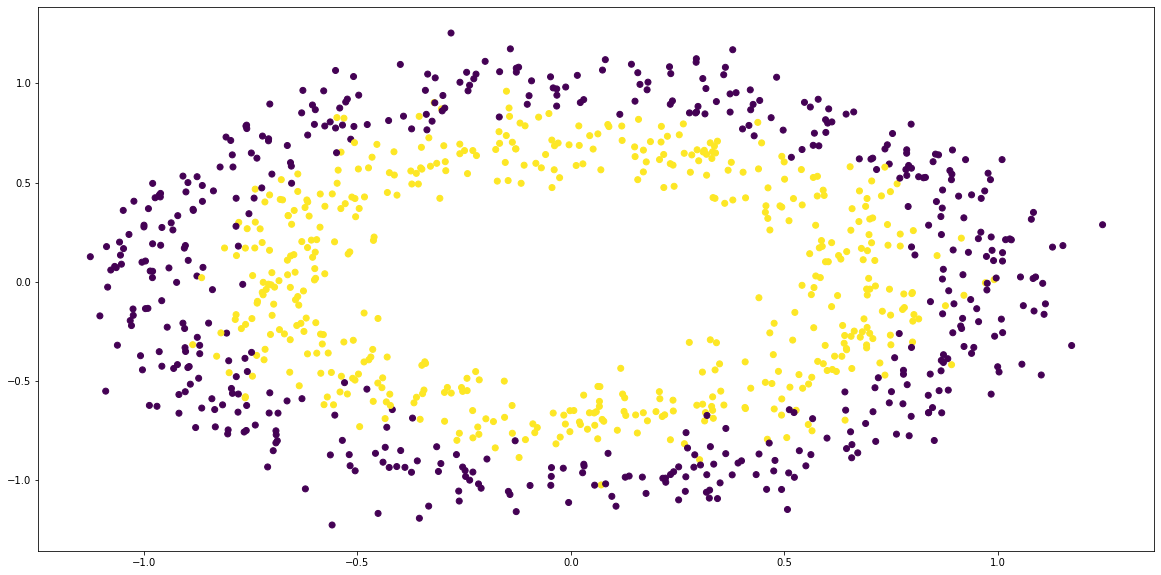

In [4]:
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).long()

# Zero Initialisation

In [6]:
# simple Network
linear = nn.Linear(2,2) # simple 2 neuron network
linear.weight.data.fill_(0) # initialise with 0

sigmoid = nn.Sigmoid() # sigmoid function to restrict between 0 and 1

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD([linear.weight], lr=0.1)

In [7]:
epochs = 100
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    # forward prop
    output = linear(x)
    output = sigmoid(output)
    
    loss = criterion(output, y) # calculate loss
    loss.backward() # calculate gradients (backprop)
    
    optimiser.step() # update weights

In [8]:
linear.weight

Parameter containing:
tensor([[-0.0006, -0.0042],
        [ 0.0006,  0.0041]], requires_grad=True)

In [9]:
_, predictions = torch.max(output, axis=1)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



/home/brandon/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


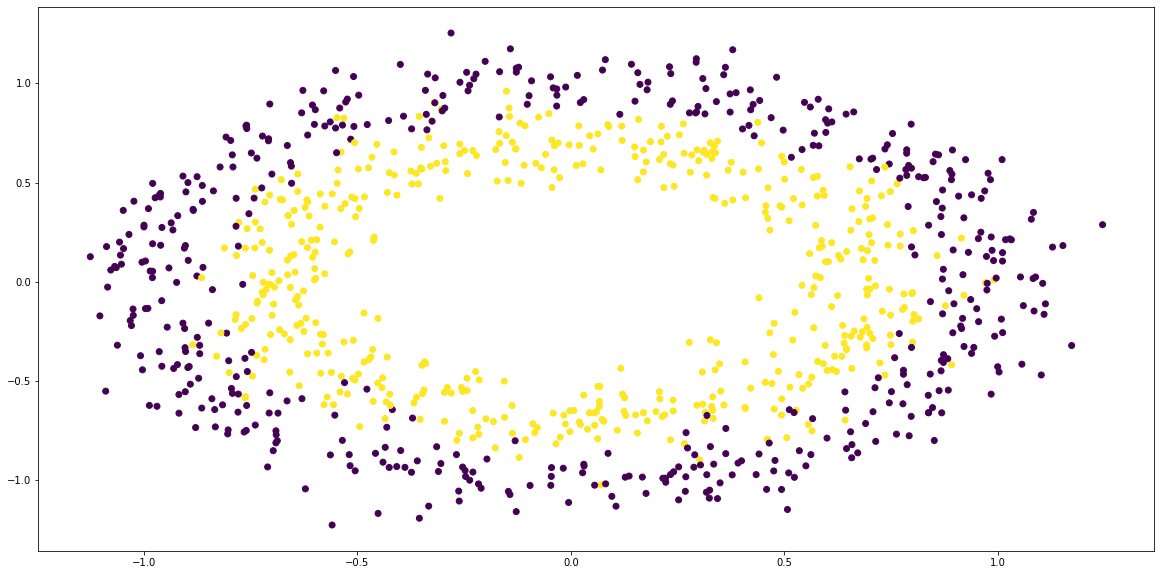

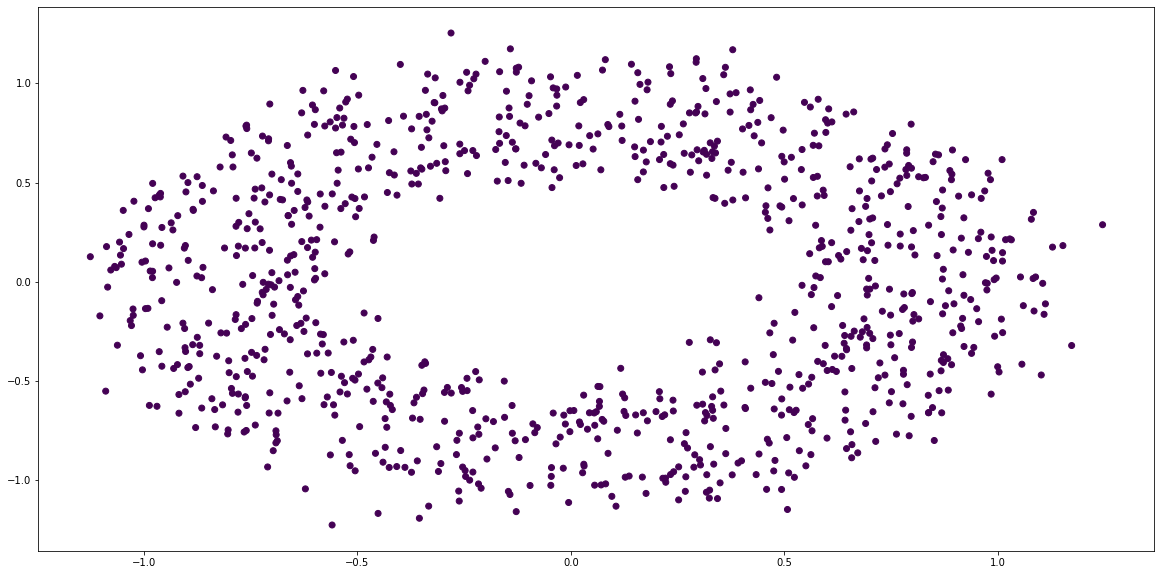

In [10]:
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=predictions)

 Observe after training, our weights optimises such that they are always symmetric. This is because after each iteration, each unit computes the exact same function from the beginning. As such, the same gradient is calculated and thus, they get updated similarly. This defeats the purpose of having multiple neurons. In the end, the model outputs the same class for each prediction.
 
What if we initialise the weights to the same value that is not 0?

In [11]:
# simple Network
linear = nn.Linear(2,2) # simple 2 neuron network
linear.weight.data.fill_(1) # initialise with 1

sigmoid = nn.Sigmoid() # sigmoid function to restrict between 0 and 1

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD([linear.weight], lr=0.1)

epochs = 100
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    # forward prop
    output = linear(x)
    output = sigmoid(output)
    
    loss = criterion(output, y) # calculate loss
    loss.backward() # calculate gradients (backprop)
    
    optimiser.step() # update weights

In [12]:
linear.weight

Parameter containing:
tensor([[0.9864, 0.9834],
        [1.0204, 1.0239]], requires_grad=True)

In [13]:
_, predictions = torch.max(output, axis=1)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



Similarly, the network faces difficult breaking symmetry.

# Random Initialisation

In [14]:
# simple Network
linear1 = nn.Linear(2,4) # simple 2 neuron network
linear1.weight.data.uniform_(0, 100) # initialise with random large weights
linear2 = nn.Linear(4,2) # simple 2 neuron network
linear2.weight.data.uniform_(0, 100) # initialise with random large weights

tanh = nn.Tanh() # tanh for the 1st layer activation
sigmoid = nn.Sigmoid() # sigmoid function to restrict between 0 and 1

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD([linear1.weight, linear2.weight], lr=0.1)

In [15]:
linear.weight

Parameter containing:
tensor([[0.9864, 0.9834],
        [1.0204, 1.0239]], requires_grad=True)

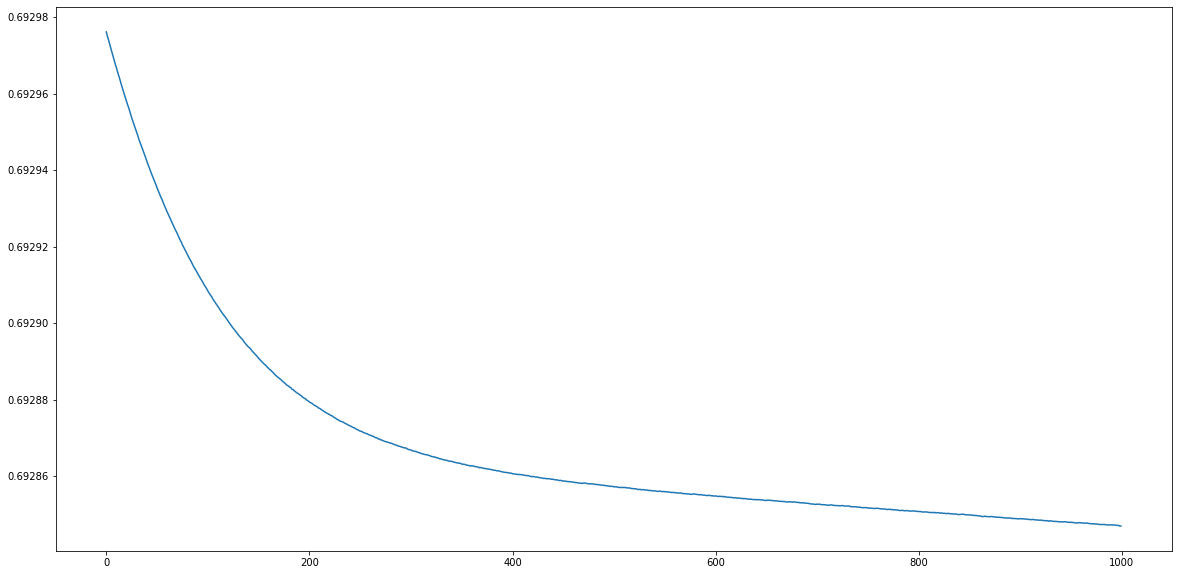

In [16]:
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    # forward prop
    output = tanh(linear1(x))
    output = sigmoid(linear2(output))
    
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss) # store loss
    running_loss.backward() # calculate gradients (backprop)
    
    optimiser.step() # update weights
    
# plot loss
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

In [17]:
linear1.weight

Parameter containing:
tensor([[ 0.4409, 80.2209],
        [24.7678, 23.1207],
        [62.3741, 23.7861],
        [70.8101, 56.9957]], requires_grad=True)

In [18]:
linear2.weight

Parameter containing:
tensor([[58.2581, 22.8669, 61.1709, 18.4970],
        [68.9177, 23.5166, 11.3281, 95.3393]], requires_grad=True)

In [19]:
_, predictions = torch.max(output, axis=1)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.53      0.20      0.29       500
           1       0.51      0.83      0.63       500

    accuracy                           0.51      1000
   macro avg       0.52      0.51      0.46      1000
weighted avg       0.52      0.51      0.46      1000



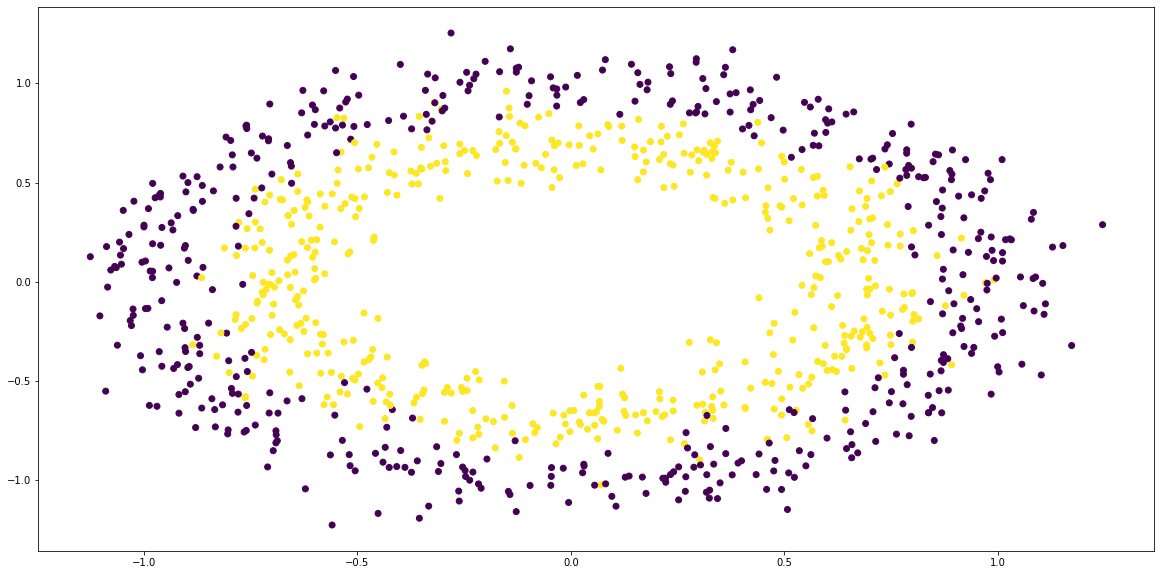

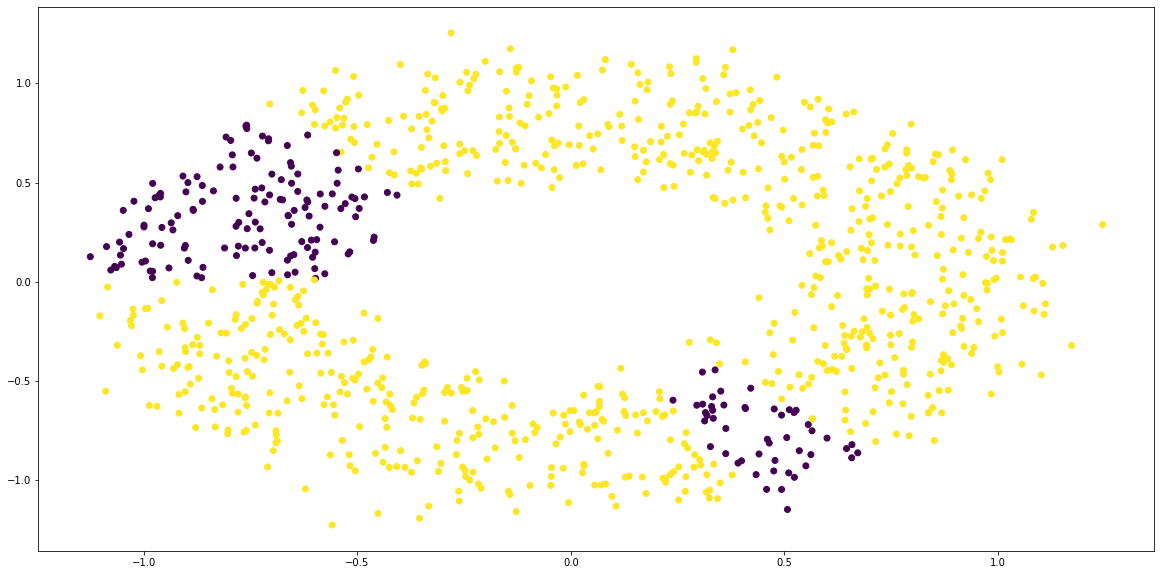

In [20]:
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=predictions)

Observe how the weights are no longer symmetric. This shows that the model is able to learn different functions and map more complex problems. However, we observe that learning is really slow where the weights are almost identifical to the starting weights even after 100 epochs. This is because large initialisation values often causes issues with activation functions such as the Sigmoid function. If z is large, the high weights would only amplify the magnitude further resulting in a vanishing gradient problem.

## Initialising with a smaller value

In [24]:
# simple Network
linear1 = nn.Linear(2,4) # simple 2 neuron network
linear1.weight.data.uniform_(0, 0.01) # initialise with random large weights
linear2 = nn.Linear(4,2) # simple 2 neuron network
linear2.weight.data.uniform_(0, 0.01) # initialise with random large weights

tanh = nn.Tanh() # tanh for the 1st layer activation
sigmoid = nn.Sigmoid() # sigmoid function to restrict between 0 and 1

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD([linear1.weight, linear2.weight], lr=0.1)

In [25]:
linear1.weight

Parameter containing:
tensor([[4.7563e-03, 8.5761e-03],
        [1.6674e-03, 2.6727e-05],
        [6.1828e-03, 7.2251e-03],
        [6.7549e-03, 2.4428e-03]], requires_grad=True)

In [26]:
linear2.weight

Parameter containing:
tensor([[0.0011, 0.0081, 0.0006, 0.0080],
        [0.0014, 0.0039, 0.0026, 0.0073]], requires_grad=True)

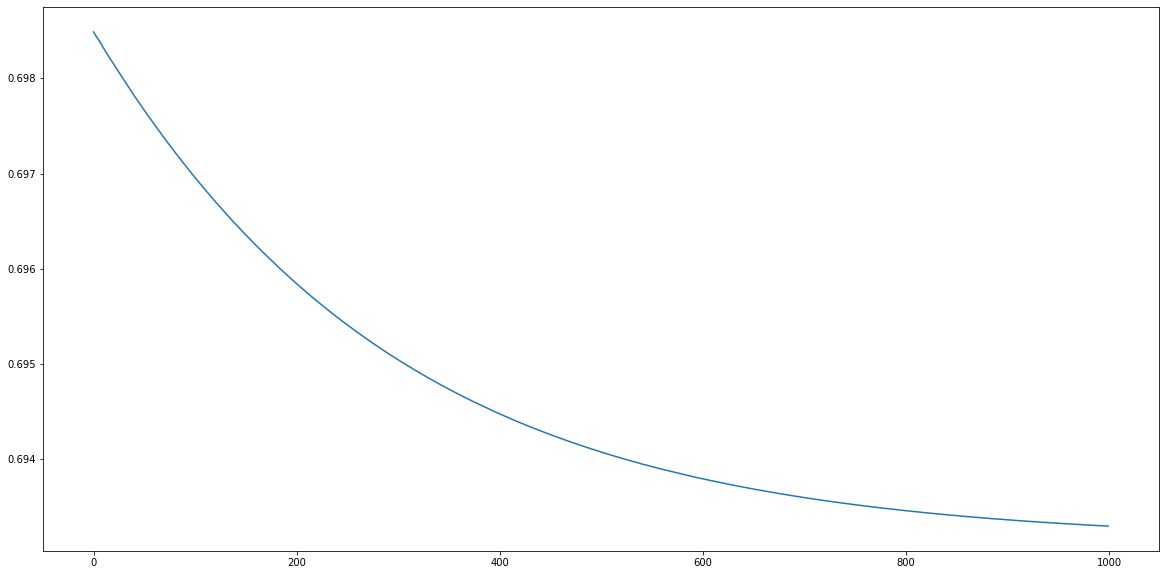

In [27]:
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    # forward prop
    output = tanh(linear1(x))
    output = sigmoid(linear2(output))
    
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss) # store loss
    running_loss.backward() # calculate gradients (backprop)
    
    optimiser.step() # update weights
    
# plot loss
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

In [28]:
linear1.weight

Parameter containing:
tensor([[ 0.0048,  0.0148],
        [ 0.0025,  0.0090],
        [ 0.0046,  0.0008],
        [ 0.0052, -0.0032]], requires_grad=True)

In [29]:
linear2.weight

Parameter containing:
tensor([[-0.2353, -0.3483,  0.1213,  0.1195],
        [ 0.2381,  0.3606, -0.1182, -0.1042]], requires_grad=True)

In [30]:
_, predictions = torch.max(output, axis=1)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



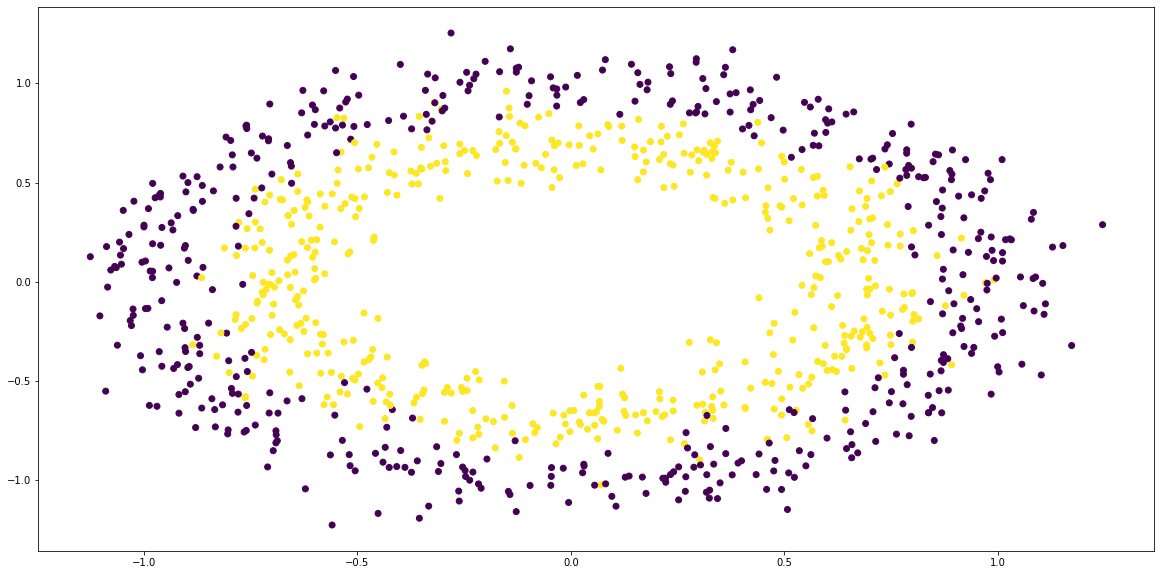

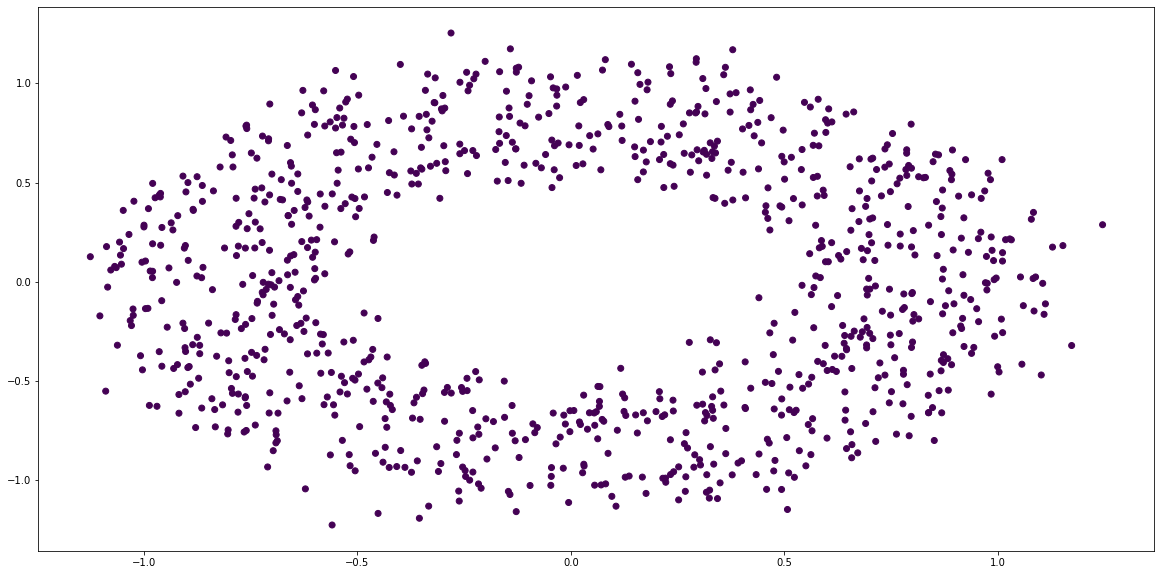

In [31]:
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=predictions)

We observe a much faster learning rate.

# He Initialisation

In [32]:
# simple Network
linear1 = nn.Linear(2,4) # simple 2 neuron network
torch.nn.init.kaiming_uniform_(linear1.weight) # initialise with random large weights
linear2 = nn.Linear(4,2) # simple 2 neuron network
torch.nn.init.kaiming_uniform_(linear2.weight) # initialise with random large weights

tanh = nn.Tanh() # tanh for the 1st layer activation
sigmoid = nn.Sigmoid() # sigmoid function to restrict between 0 and 1

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD([linear1.weight, linear2.weight], lr=0.5)

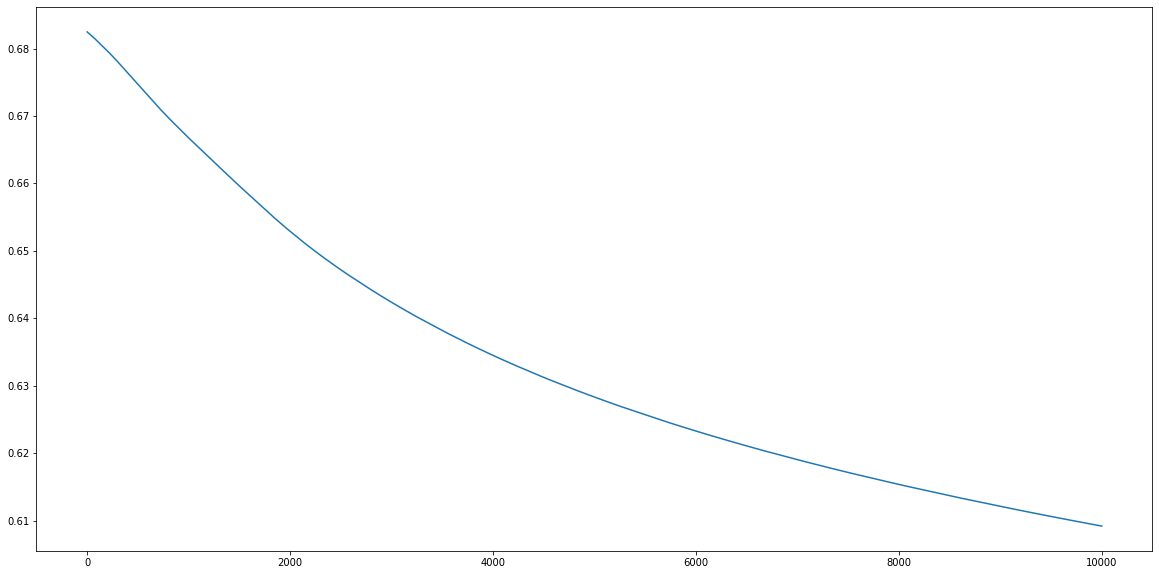

In [35]:
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    # forward prop
    output = tanh(linear1(x))
    output = sigmoid(linear2(output))
    
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss) # store loss
    running_loss.backward() # calculate gradients (backprop)
    
    optimiser.step() # update weights
    
# plot loss
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

              precision    recall  f1-score   support

           0       1.00      0.04      0.08       500
           1       0.51      1.00      0.68       500

    accuracy                           0.52      1000
   macro avg       0.76      0.52      0.38      1000
weighted avg       0.76      0.52      0.38      1000



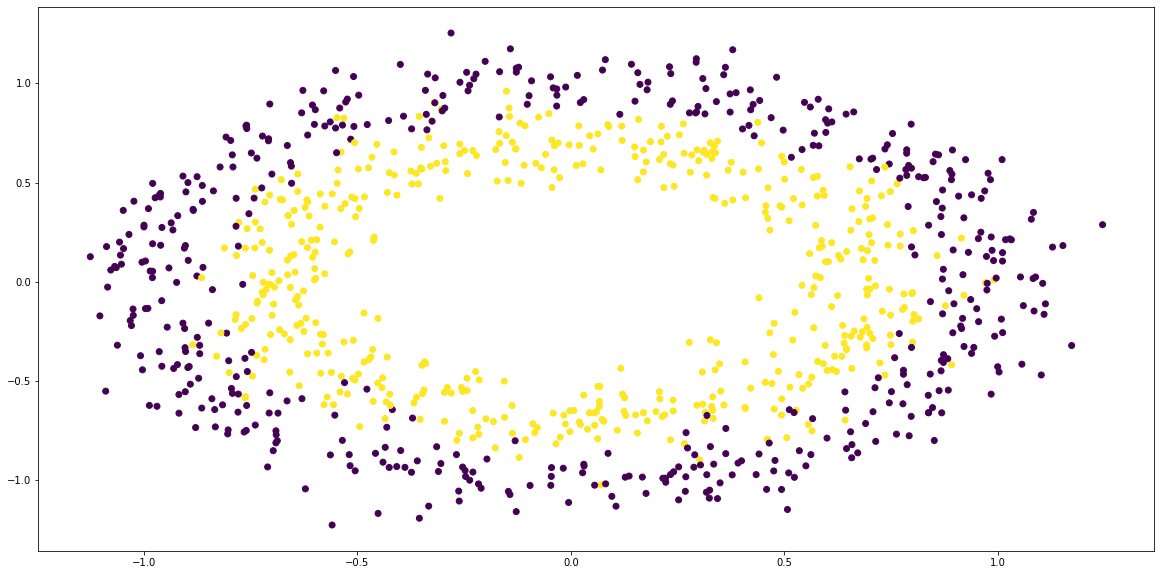

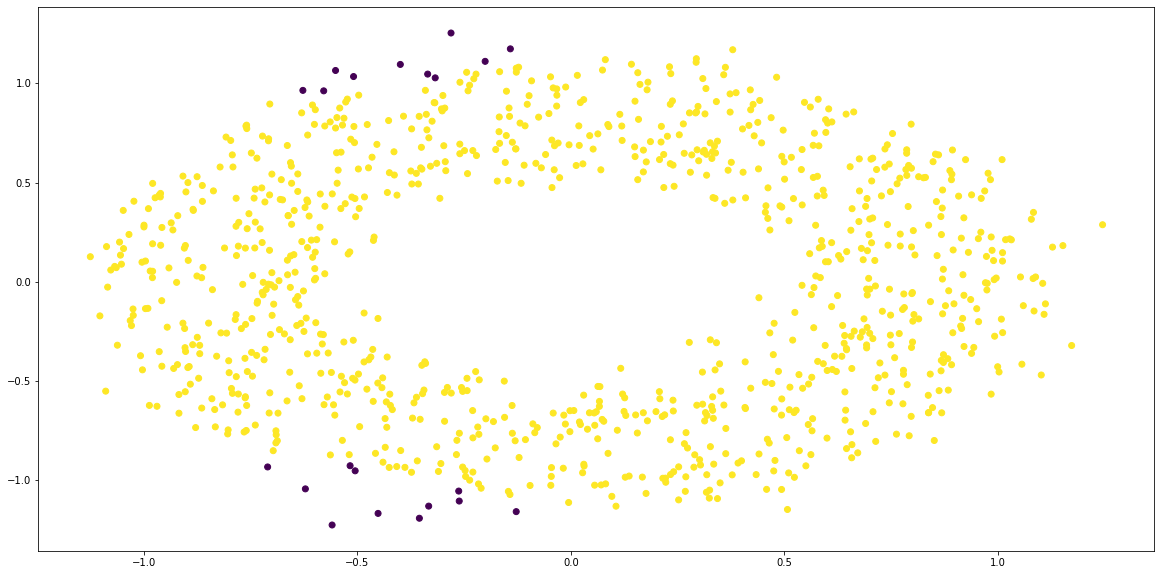

In [36]:
_, predictions = torch.max(output, axis=1)
print(classification_report(y, predictions))

plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=predictions)

# Xavier Initialisation

In [43]:
# simple Network
linear1 = nn.Linear(2,4) # simple 2 neuron network
torch.nn.init.xavier_uniform_(linear1.weight) # initialise with random large weights
linear2 = nn.Linear(4,2) # simple 2 neuron network
torch.nn.init.xavier_uniform_(linear2.weight) # initialise with random large weights

tanh = nn.Tanh() # tanh for the 1st layer activation
sigmoid = nn.Sigmoid() # sigmoid function to restrict between 0 and 1

# loss function - CrossEntropy, optimiser - SGD
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD([linear1.weight, linear2.weight], lr=0.5)

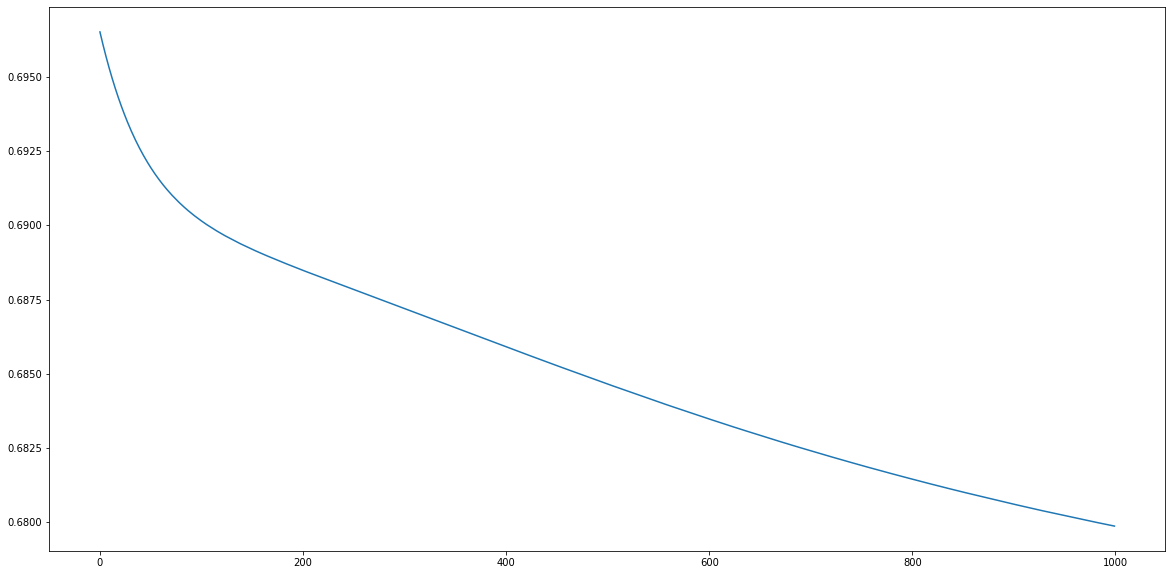

In [44]:
epochs = 1000
loss = []

for e in range(epochs):
    optimiser.zero_grad() # zero out gradients
    
    # forward prop
    output = tanh(linear1(x))
    output = sigmoid(linear2(output))
    
    running_loss = criterion(output, y) # calculate loss
    loss.append(running_loss) # store loss
    running_loss.backward() # calculate gradients (backprop)
    
    optimiser.step() # update weights
    
# plot loss
plt.figure(figsize=[20,10])
plt.plot(range(epochs), loss)

              precision    recall  f1-score   support

           0       0.93      0.20      0.33       500
           1       0.55      0.99      0.71       500

    accuracy                           0.59      1000
   macro avg       0.74      0.59      0.52      1000
weighted avg       0.74      0.59      0.52      1000



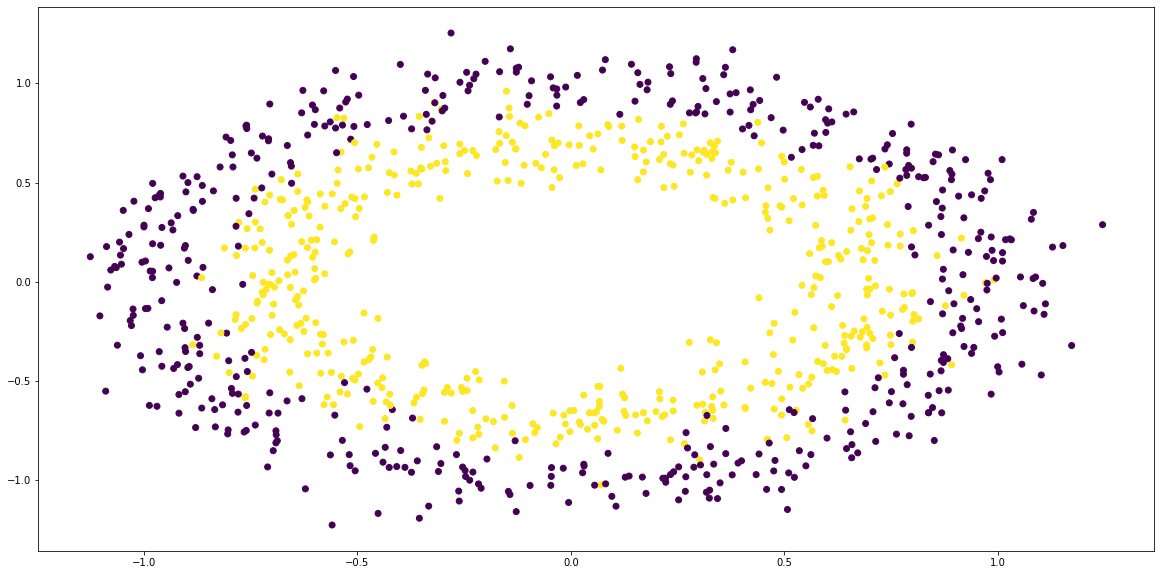

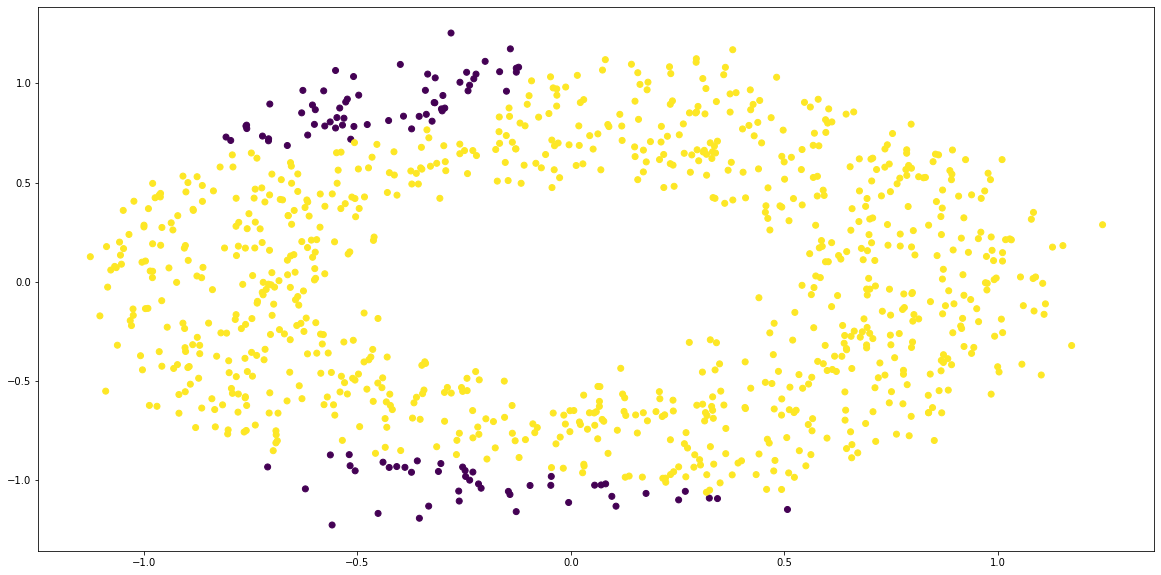

In [45]:
_, predictions = torch.max(output, axis=1)
print(classification_report(y, predictions))

plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()
plt.figure(figsize=[20,10])
plt.scatter(x[:,0], x[:,1], c=predictions)